In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [3]:
path = "tetris_blocks.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

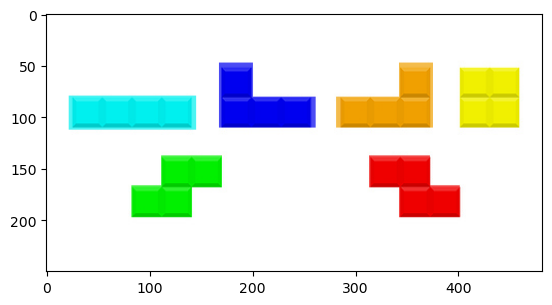

In [5]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

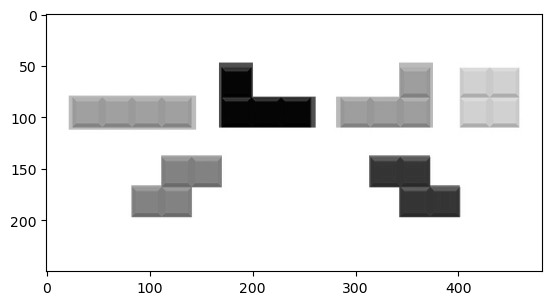

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


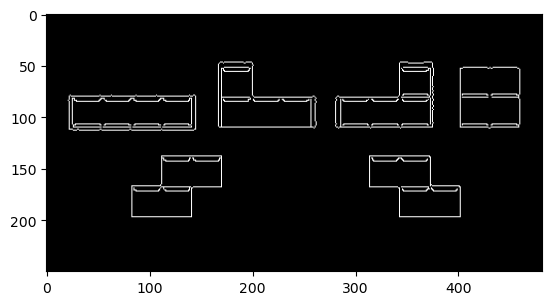

In [9]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

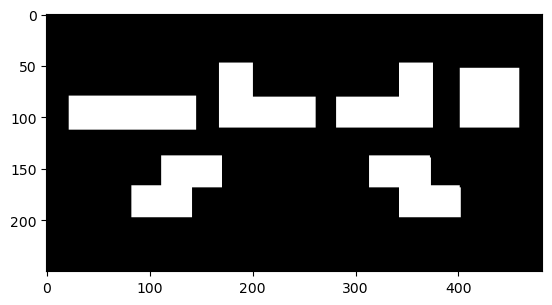

In [11]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [13]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

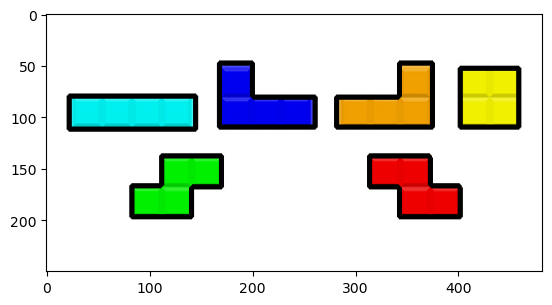

In [15]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

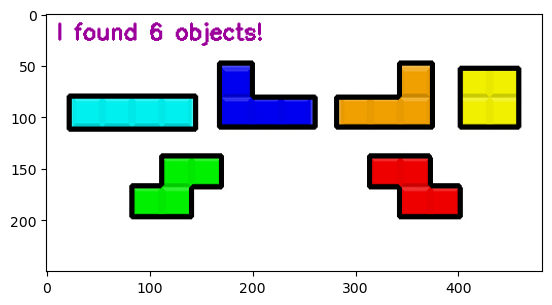

In [17]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

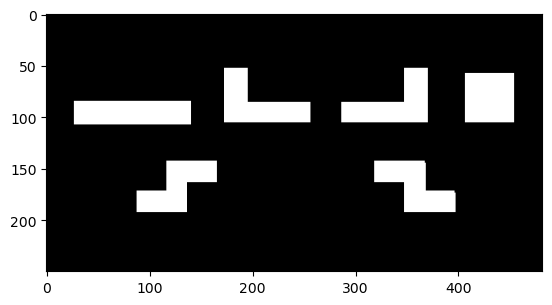

In [19]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

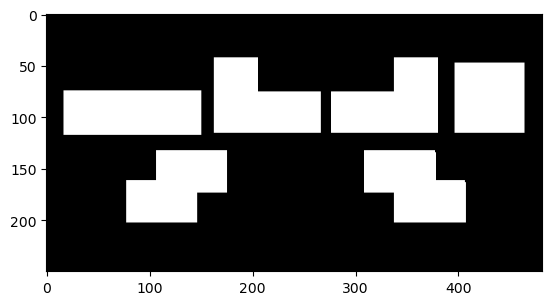

In [21]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

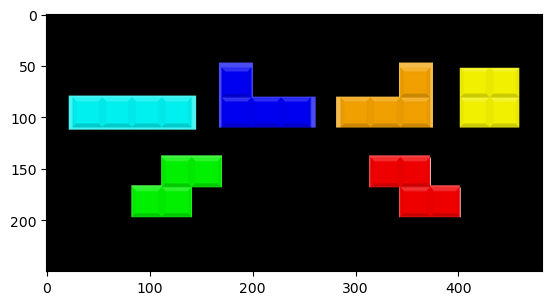

In [23]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

# _Solution 1_

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [216]:
path = "tetris_blocks.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

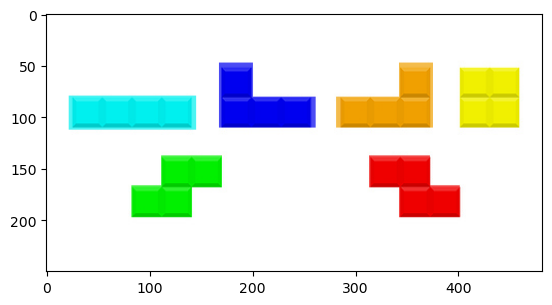

In [222]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

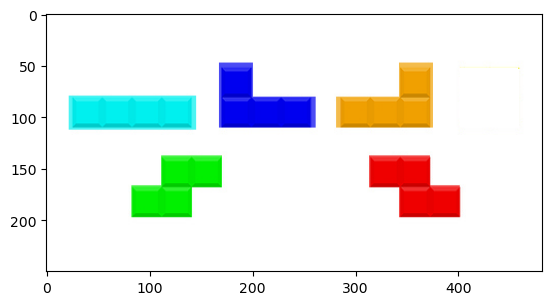

In [228]:
# Convert the image to HSV
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

# Define lower and upper ranges for the yellow color (you might need to adjust these values)
lower_yellow = np.array([22, 150, 150])   # Lower bound for yellow in HSV
upper_yellow = np.array([30, 255, 255])   # Upper bound for yellow in HSV

# Create a mask for the yellow regions
yellow_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Invert the mask to keep non-yellow regions
mask_inv = cv2.bitwise_not(yellow_mask)

# Create a version of the original image without the yellow object
# Black-out the yellow area by applying the inverse mask
image_without_yellow = cv2.bitwise_and(bgr_img, bgr_img, mask=mask_inv)

# Fill yellow area with white color (255, 255, 255)
result_img = bgr_img.copy()
result_img[yellow_mask == 255] = [255, 255, 255]

# Convert BGR to RGB for display using matplotlib
image_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.show()


# _Solution 2_ & 3

In [267]:
path = "spheres.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

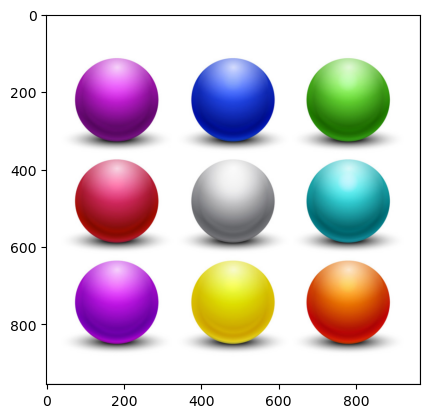

In [270]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

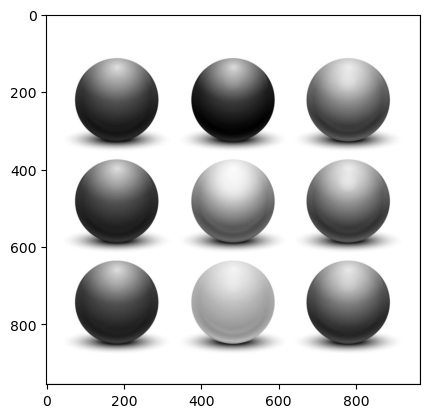

In [237]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


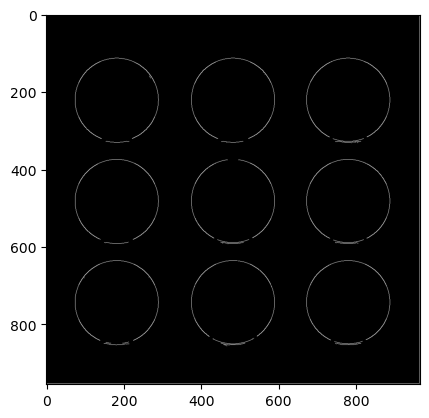

In [240]:
edged = cv2.Canny(gray, 100, 132)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

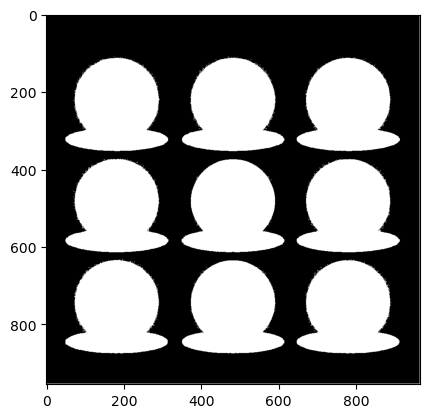

In [243]:
threshold = 251
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [246]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

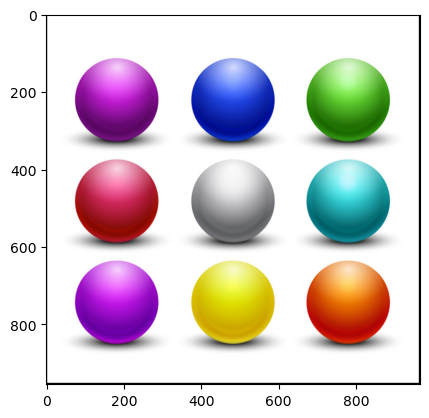

In [249]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

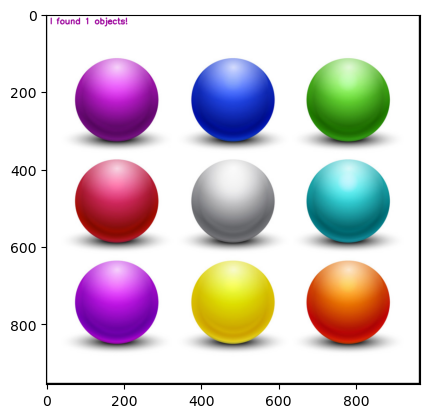

In [252]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

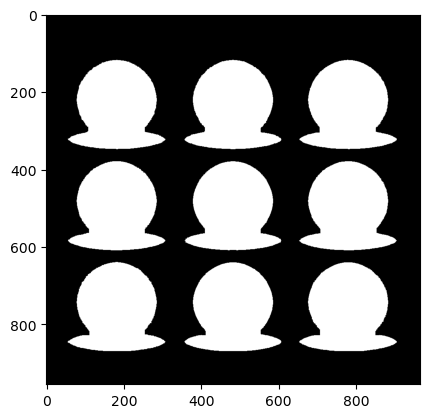

In [255]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

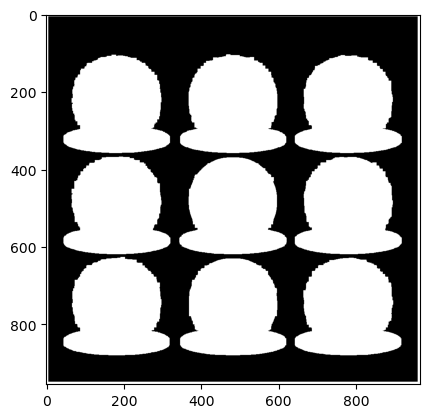

In [258]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

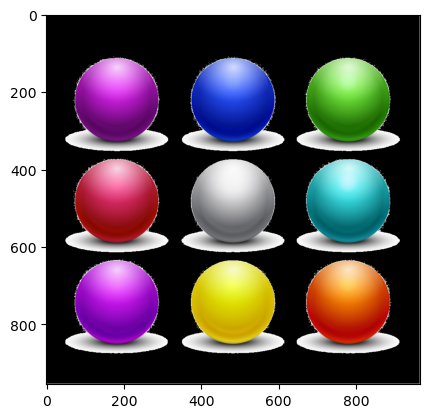

In [261]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# _Solution 4_

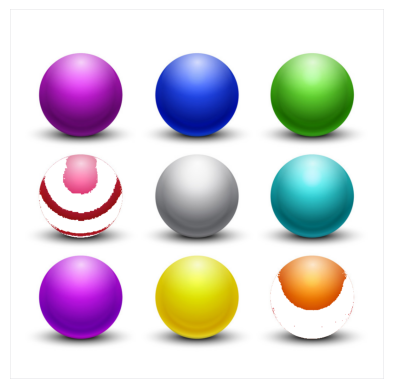

In [284]:
# Read the image and convert to HSV
bgr_img = cv2.imread(path)
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

# Define adjusted HSV thresholds for red
#lower_red1 = np.array([0, 100, 100])  # Lower red
#upper_red1 = np.array([10, 255, 255])  # Upper red for lower range
lower_red2 = np.array([170, 100, 100])  # Lower red for upper range
upper_red2 = np.array([175, 255, 255])  # Adjusted upper red to exclude orange

# Create masks for red regions
mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Invert the mask to keep non-red regions
mask_inv = cv2.bitwise_not(red_mask)

# Create a version of the original image without the red object
image_without_red = cv2.bitwise_and(bgr_img, bgr_img, mask=mask_inv)

# Optionally, fill red areas with white color (255, 255, 255)
result_img = bgr_img.copy()
result_img[red_mask == 255] = [255, 255, 255]

# Convert BGR to RGB for display using matplotlib
image_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display the resulting image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [286]:
#Hmm, not really...

# _Solution 5_

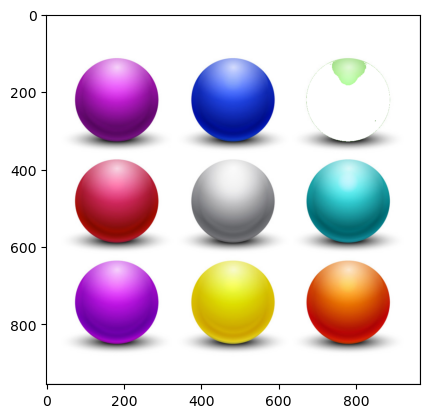

In [290]:
# Read the image and convert to HSV
bgr_img = cv2.imread(path)
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

# Define adjusted HSV thresholds for green
lower_green = np.array([40, 100, 100])  # Adjusted lower green
upper_green = np.array([80, 255, 255])   # Adjusted upper green

# Create a mask for green regions
green_mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Invert the mask to keep non-green regions
mask_inv = cv2.bitwise_not(green_mask)

# Create a version of the original image without the green object
image_without_green = cv2.bitwise_and(bgr_img, bgr_img, mask=mask_inv)

# Optionally, fill green areas with white color (255, 255, 255)
result_img = bgr_img.copy()
result_img[green_mask == 255] = [255, 255, 255]

# Convert BGR to RGB for display using matplotlib
image_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Display the resulting image
plt.imshow(image_rgb)
plt.show()


In [292]:
#Quite better